# Advanced Visualization with Seaborn
**Introduction to Python Programming for Earth Scientists**, session #XX, 27 November 2023

## Goals
* Find data online and understand how to use metadata to interpret it
* Use seaborn and pandas to understand how data is correlated
* Use the "hue" argument to categorize data

Earlier in this semester some fellow students have already introduced you to Seaborn, a libary to make statistical visualizations of data.  We will spend a little more time using this library to explore a dataset of water samples from Gordon Gulch, west of Boulder.  This data was collected by CU Boulder goegraphy masters student Maggie Burns and her advisor, Holly Barnard.  The data is available here: https://www.hydroshare.org/resource/25ba8374892541c4bfe0c9cf18f520ca/  
Please read about what the data is on this website.  Once you understand what the data, please download it from Hydroshare and upload it to the JupyterHub

Seaborn is build on Pandas, and matplotlib.  While we won't have to engadge with matplotlib directly, understanding matplotlib is necessary to customize seaborn plots, and many advanced examples freely blend the two.  For now, we will import pandas and seaborn.

In [2]:
import pandas as pd
import seaborn as sns

Next, we will load in our data CSV into seaborn.  First we will define the path variable as a string (the exact value will depend on where you uploaded the data file!) and load it as a dataframe

In [9]:
!ls ../../Scratch/DOM*

DOM_MA_Data.csv        DOM_MA_Data_meta.xml   DOM_MA_Data_resmap.xml


In [10]:
data_path = "../../Scratch/DOM_MA_Data.csv/DOM_MA_Data.csv" # for me, it was "cub/teaching/python/DOM_MA_Data.csv"
df = pd.read_csv(data_path)

Now, preview the data frame to think about how we will reference it

In [11]:
df

,SampleID,Date,DOY,Site,Depth (cm),DOC (mg/L),GG-SQ1,GG-SQ2,GG-OQ,GG-PS,...,max emission at 370nm,a254cm,HIX,BIX,LAT,LONG,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,13MB189,3/21/2013,80,GW1,9.41 - 18.55m,0.28,0.05,0.07,0.02,0.38,...,444,0.00,0.64,1.05,NaN,NaN,NaN,NaN,NaN,NaN
1,13MB190,4/10/2013,100,GW1,9.41 - 18.55m,0.14,0.02,0.07,0.00,0.50,...,446,0.00,1.33,1.05,NaN,NaN,NaN,NaN,NaN,NaN
2,13MB193,5/10/2013,130,GW1,9.41 - 18.55m,0.18,0.11,0.13,0.21,0.55,...,430,0.00,1.16,0.97,NaN,NaN,NaN,NaN,NaN,NaN
3,13MB195,5/17/2013,137,GW1,9.41 - 18.55m,0.25,0.02,0.05,0.04,0.26,...,430,0.01,0.49,1.06,NaN,NaN,NaN,NaN,NaN,NaN
4,13MB197,7/18/2013,199,GW1,9.41 - 18.55m,0.22,0.07,0.09,0.16,0.55,...,428,0.04,0.97,0.98,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,13MB163,5/12/2013,132,Stream,NaN,8.30,0.33,0.20,0.35,0.44,...,468,0.15,3.42,0.57,40.0128,-105.47,NaN,NaN,NaN,NaN
170,13MB172,5/16/2013,136,Stream,NaN,7.08,0.33,0.21,0.36,0.41,...,466,0.15,3.85,0.57,40.0128,-105.47,NaN,NaN,NaN,NaN
171,13MB173,5/16/2013,136,Stream,NaN,7.24,0.34,0.21,0.37,0.42,...,468,0.15,3.86,0.57,40.0128,-105.47,NaN,NaN,NaN,NaN
172,13MB175,5/19/2013,139,Stream,NaN,6.32,0.34,0.21,0.36,0.44,...,466,0.15,3.61,0.56,40.0128,-105.47,NaN,NaN,NaN,NaN


In seaborn, like pandas, we pass a data frame and reference columns with a stringcorresponding to the column name.  This is in contrast to MatPlotLib, where we pass arrays of data.  Lets start with making a line plot to look at how Dissolved Organic Carbon (DOC) changes over the year

<Axes: xlabel='Date', ylabel='DOC (mg/L)'>

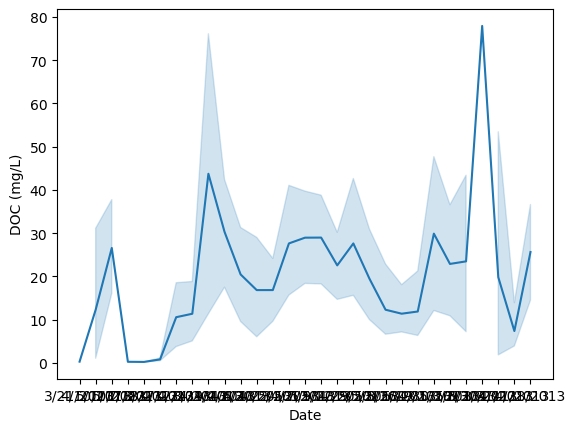

In [12]:
sns.lineplot(data=df, x="Date", y="DOC (mg/L)")

Wow!  Not just a simple a line plot!  There's a few things we should think about.  First, did you get some scary looking warnings?  Read what they *actually* say.  Do you think this is something you need to worry about?  Secondly, notice that there is a line, and an area.  What do you think that area is?  Take a look at the lineplot documentation: https://seaborn.pydata.org/generated/seaborn.lineplot.html
Lastly, that x-axis is troublesome.  Lets clean it up a bit.  The immediate issue, is that the "date" column contains strings, which Python isn't parsing as a date.  This means it can't group the labels on the X axis correctly, but it's also an issue because, as you may have seen from the table, the rows of observations aren't in chronological order!
 ## <font color = green> IN-CLASS PRACTICE </font> 
Make a lineplot of DOC that is in chronolgical order.  

<Axes: xlabel='DOY', ylabel='DOC (mg/L)'>

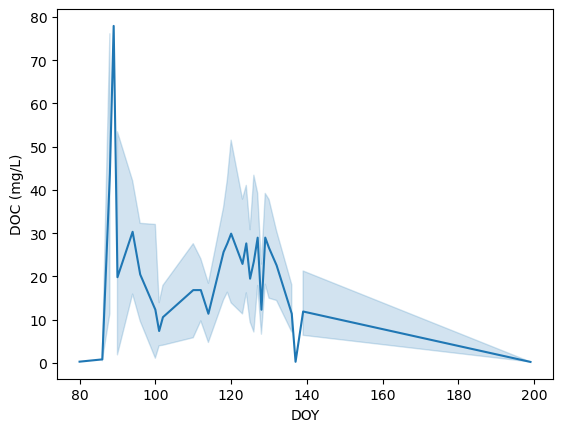

In [19]:
# HINT: There are a few ways to do this, but there is a column
# in the table that you can use without issue
df = df.sort_values(by="Date")
sns.lineplot(data=df, x="DOY", y="DOC (mg/L)")

## Exploring Correlations
Now we will look at correlations in this dataset.  There are a LOT of columns here, so we will select some that we think might be interesting.  Feel free to add and remove columns from the list

In [20]:
variables = ["DOC (mg/L)", # Dissolved organic carbon
             "HIX", # Humification Index
             "BIX", # Freshness Index
             "FI", # Florescene Index
             "Percent Protein"]

Now we will subset our dataframe so that we are only working with the values we care about, and avoid things that might confuse python, like sample IDs

In [22]:
df_subset = df[variables]
df_subset

,DOC (mg/L),HIX,BIX,FI,Percent Protein
0,0.28,0.64,1.05,1.68,73.78
25,1.41,2.47,0.50,1.27,23.66
119,1.10,0.69,1.06,2.01,63.90
7,0.58,0.73,0.76,1.42,70.36
89,0.39,0.75,0.56,1.52,68.73
...,...,...,...,...,...
21,17.96,11.43,0.46,1.29,6.25
85,49.57,11.82,0.47,1.40,4.96
127,46.60,6.94,0.46,1.35,6.00
6,0.22,1.12,0.79,1.45,51.85


Dataframes hace a method `corr`, which generate a correlation matrix, which scores each varaible pair by how correlated they are using the pearson correlation coefficent.  We can pass that to the seaborn heatmap function to get a nice figure:

<Axes: >

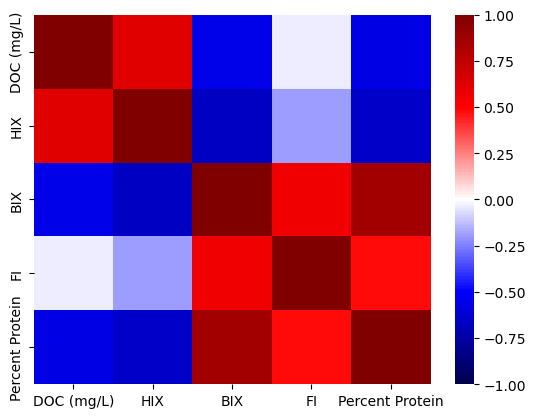

In [24]:
sns.heatmap(df_subset.corr(), vmax=1, vmin=-1, cmap="seismic")

Lets look at how these data compare directly.  Seaborn has a plot for that!  The pairplot!  It does a scatterplot of every combination and a histogram of each variable.

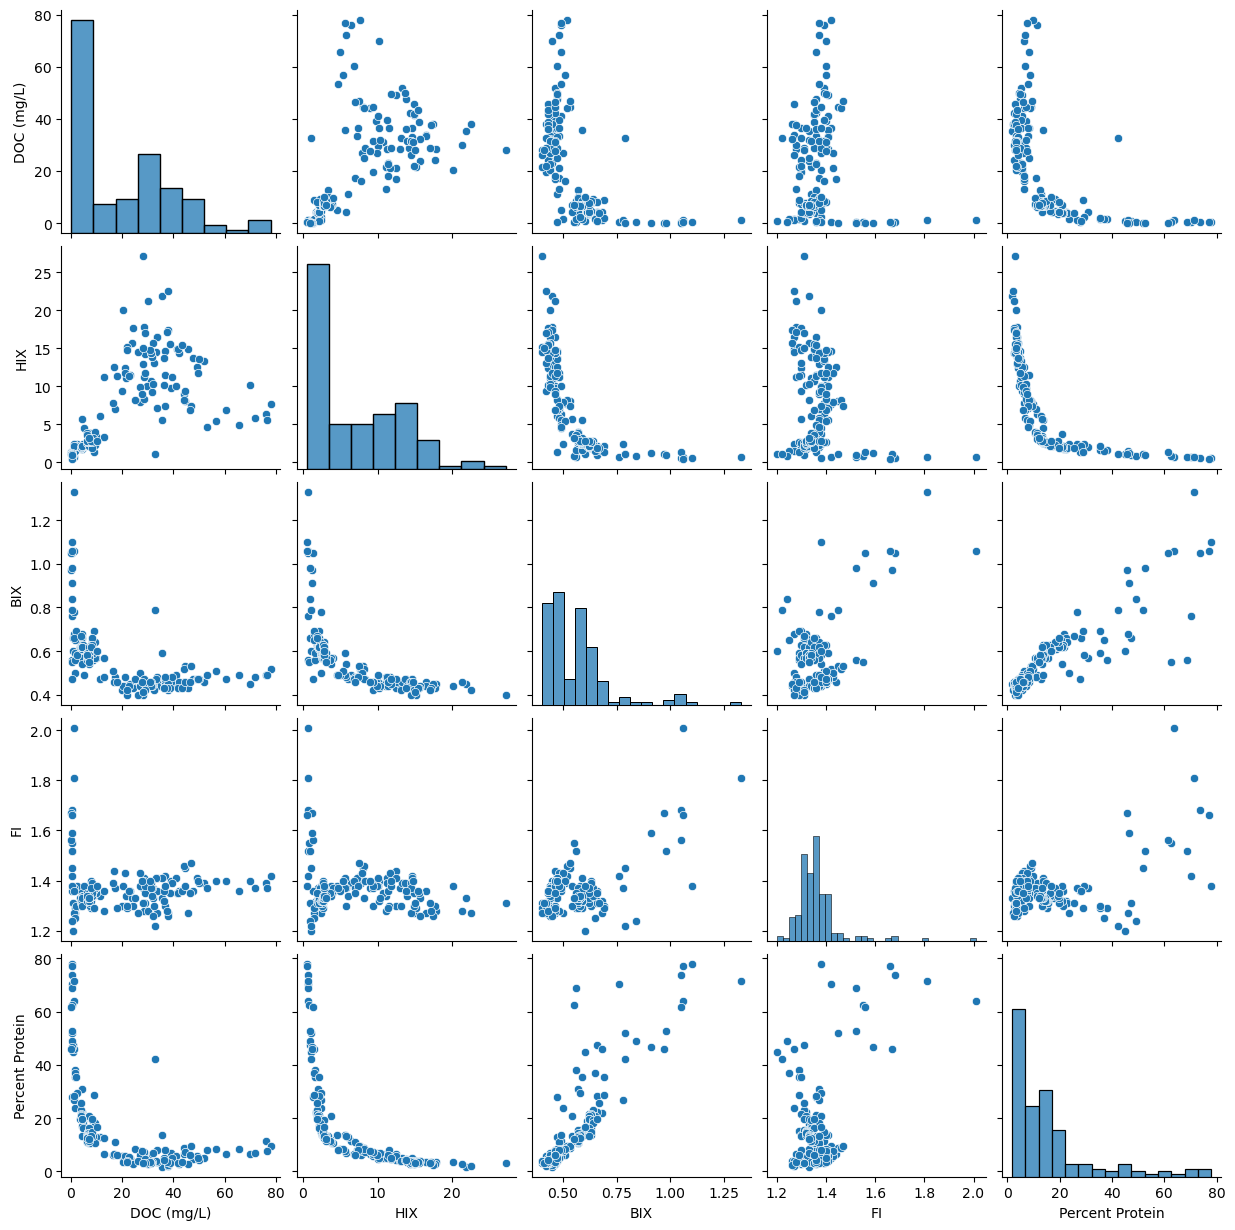

In [25]:
sns.pairplot(df_subset)

### Categorizing Data
Seaborn also lets you color data by category in a plot using the "hue" parameter.  This is an easy way to plot multiple groups of the same data in the same plot.  We will try categorizing by site

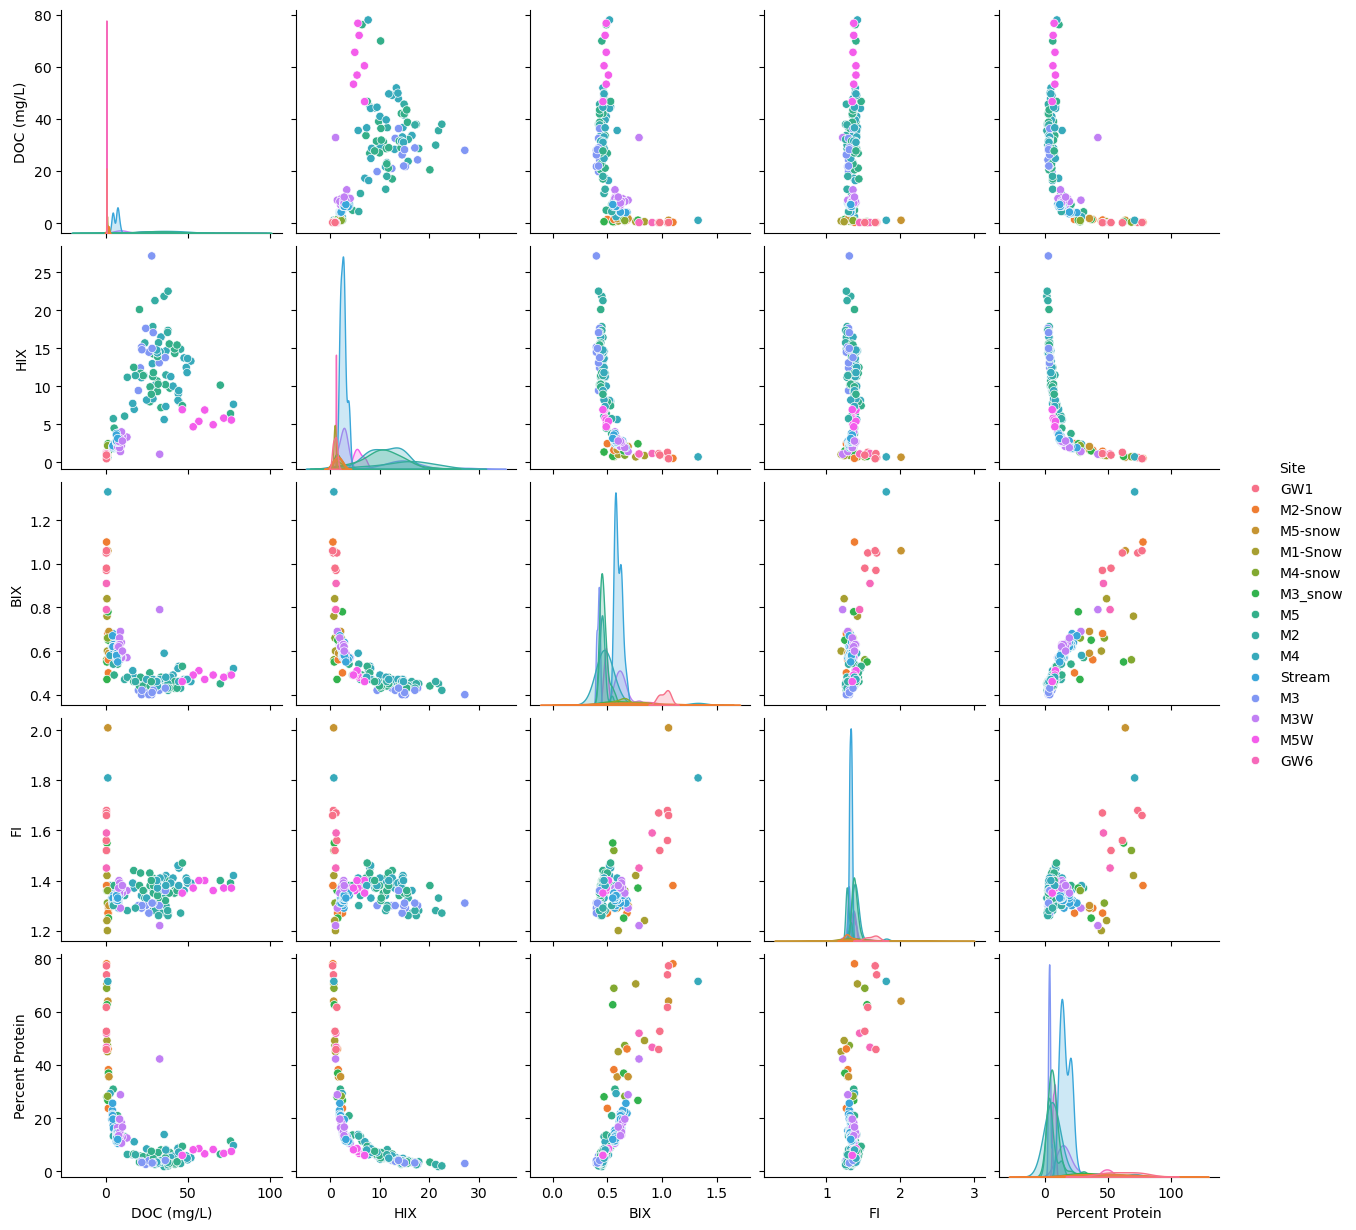

In [26]:
variables.append("Site")
df_subset = df[variables]
sns.pairplot(df_subset, hue="Site")

 ## <font color = green> IN-CLASS PRACTICE </font> 
Choose a pair of variables to explore in more depth with seaborn.  I suggest using the function `regplot` (https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) but explore the seaborn documentation and use any function or functions you want!

<Axes: xlabel='DOC (mg/L)', ylabel='HIX'>

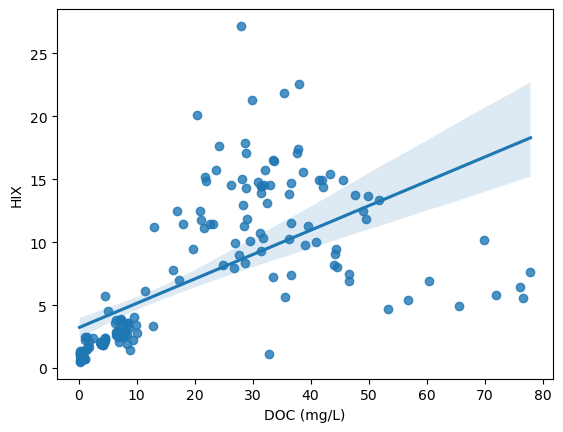

In [28]:
sns.regplot(data=df, x="DOC (mg/L)", y="HIX")

In [27]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is